In [667]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.metrics import accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## Data Collection and Analysis

In [668]:
#Extracting data
df = pd.read_csv('diabetes.csv')

In [669]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [670]:
#dataset dimensions
df.shape

(768, 9)

In [671]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [672]:
#handle column with value 0
features = df.columns
cols = (df[features] == 0).sum()
print(cols)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [673]:
#cannot drop these values,if drop data set will be very small. So handle them.

In [674]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [675]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [676]:
#Replace the null values with the median of that column:

df['Glucose'].fillna(df['Glucose'].median(), inplace =True)

df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace =True)

df['BMI'].fillna(df['BMI'].median(), inplace =True)

df['Insulin'].fillna(df['Insulin'].median(), inplace =True)

df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace =True)

In [677]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.682000,70.920000,27.726000,127.792000,30.885600,0.429734,31.190000
1,4.865672,142.130597,75.123134,31.686567,164.701493,35.383582,0.550500,37.067164


#### Visualization of Target Variable 

[Text(0, 0, 'Healthy'), Text(1, 0, 'Diabetic')]

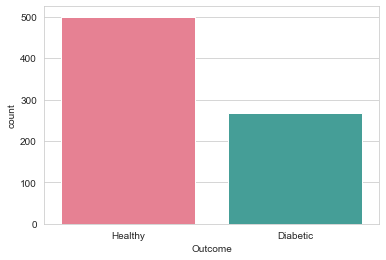

In [678]:
#Count values of outcomes
df['Outcome'].value_counts()
sns.countplot(x='Outcome',data=df)
ax = sns.countplot(x=df['Outcome'], data=df,palette="husl")
ax.set_xticklabels(["Healthy","Diabetic"])

### Distribution of other features

#### Distribution of Pregnancies

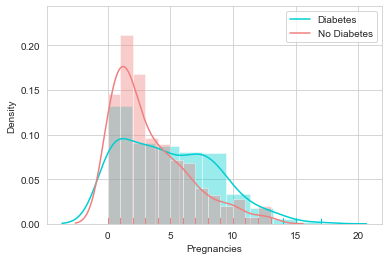

In [679]:
plt.figure()
ax = sns.distplot(df['Pregnancies'][df.Outcome == 1], color ="darkturquoise", rug = True)
sns.distplot(df['Pregnancies'][df.Outcome == 0], color ="lightcoral",rug = True)
plt.legend(['Diabetes', 'No Diabetes'])

#### Distribution of Glucose

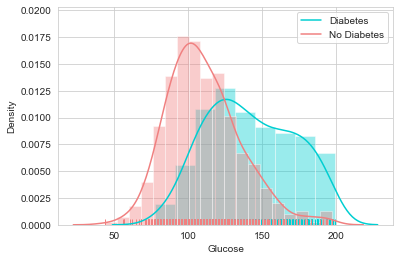

In [680]:
plt.figure()
ax = sns.distplot(df['Glucose'][df.Outcome == 1], color ="darkturquoise", rug = True)
sns.distplot(df['Glucose'][df.Outcome == 0], color ="lightcoral", rug = True)
plt.legend(['Diabetes', 'No Diabetes'])

#### Distribution of BloodPressure 

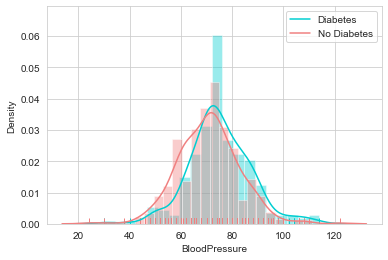

In [681]:
plt.figure()
ax = sns.distplot(df['BloodPressure'][df.Outcome == 1], color ="darkturquoise", rug=True)
sns.distplot(df['BloodPressure'][df.Outcome == 0], color ="lightcoral", rug=True)
plt.legend(['Diabetes', 'No Diabetes'])

#### Distribution of SkinThickness 

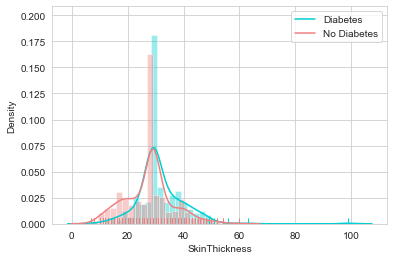

In [682]:
plt.figure()
ax = sns.distplot(df['SkinThickness'][df.Outcome == 1], color ="darkturquoise", rug=True)
sns.distplot(df['SkinThickness'][df.Outcome == 0], color ="lightcoral", rug=True)
plt.legend(['Diabetes', 'No Diabetes'])

####  Distribution of Insulin

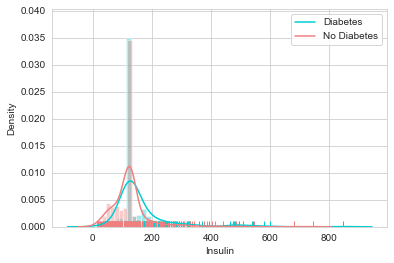

In [683]:
plt.figure()
ax = sns.distplot(df['Insulin'][df.Outcome == 1], color ="darkturquoise", rug=True)
sns.distplot(df['Insulin'][df.Outcome == 0], color ="lightcoral", rug=True)
plt.legend(['Diabetes', 'No Diabetes'])

#### Distribution of BMI 

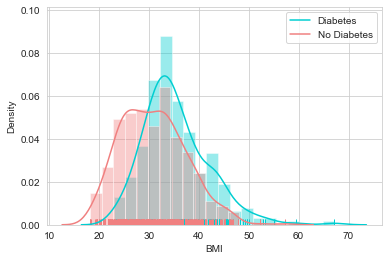

In [684]:
plt.figure()
ax = sns.distplot(df['BMI'][df.Outcome == 1], color ="darkturquoise", rug=True)
sns.distplot(df['BMI'][df.Outcome == 0], color ="lightcoral", rug=True)
plt.legend(['Diabetes', 'No Diabetes'])

#### Distribution of DiabetesPedigreeFunction 

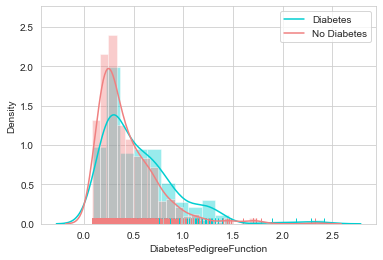

In [685]:
plt.figure()
ax = sns.distplot(df['DiabetesPedigreeFunction'][df.Outcome == 1], color ="darkturquoise", rug=True)
sns.distplot(df['DiabetesPedigreeFunction'][df.Outcome == 0], color ="lightcoral", rug=True)
plt.legend(['Diabetes', 'No Diabetes'])

#### Distribution of Age

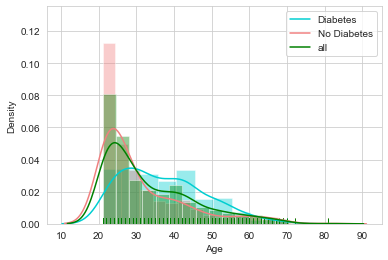

In [686]:
plt.figure()
ax = sns.distplot(df['Age'][df.Outcome == 1], color ="darkturquoise", rug=True)
sns.distplot(df['Age'][df.Outcome == 0], color ="lightcoral", rug=True)
sns.distplot(df['Age'], color ="green", rug=True)
plt.legend(['Diabetes', 'No Diabetes', 'all'])

### BoxPlot to check for Outliers 

<AxesSubplot:xlabel='SkinThickness'>

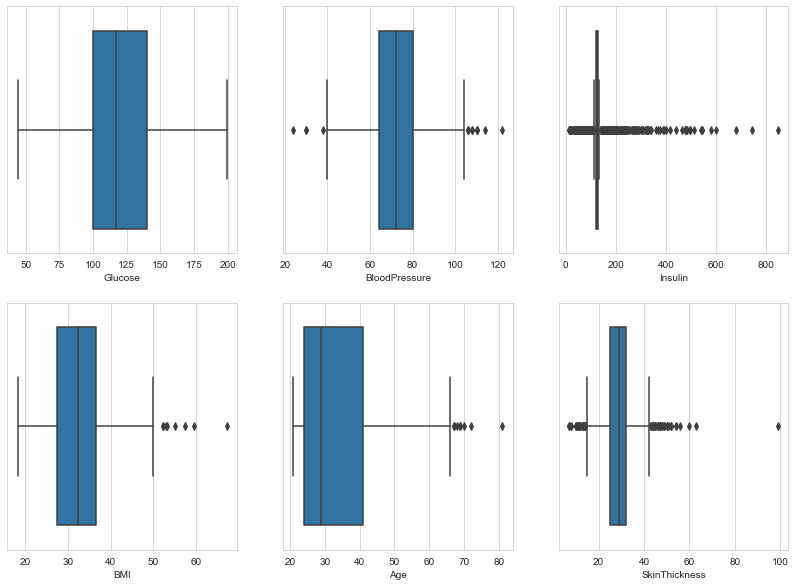

In [687]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(2,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(2,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(2,3,6)
sns.boxplot(x='SkinThickness',data=df)

### Correlation Matrix 

<AxesSubplot:>

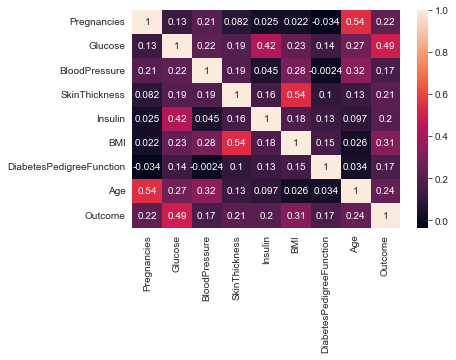

In [688]:
corr_mat=df.corr()
sns.heatmap(corr_mat, annot=True)
# Output depends majority on glucose

### Pair Plot 

In [689]:
#sns.pairplot(df, hue="Outcome",palette="husl")

### Separating the data and labels

In [690]:
X = df.drop(columns='Outcome', axis=1)
Y = df['Outcome']

### Data Standardization

In [691]:
scaler = StandardScaler()

In [692]:
scaler.fit(X)

StandardScaler()

In [693]:
standardized_data = scaler.transform(X)

In [694]:
X = standardized_data

### Split Data

In [695]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

### Model Building & Evaluation

#### SVM Model 

In [696]:
model=svm.SVC(kernel='rbf')
model.fit(X_train,Y_train)

SVC()

In [697]:
y_pred=model.predict(X_test)
accuracy_score(Y_test,y_pred)

0.7792207792207793

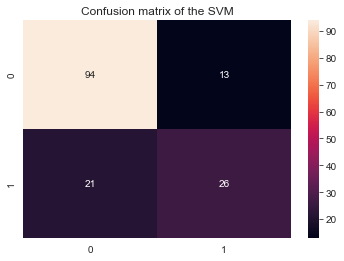

In [698]:
cm_logi = confusion_matrix(Y_test, y_pred)
plt.title('Confusion matrix of the SVM')
sns.heatmap(cm_logi,annot=True,fmt="d")
plt.show()

In [699]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       107
           1       0.67      0.55      0.60        47

    accuracy                           0.78       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.77      0.78      0.77       154



#### Random Forest Model 

In [700]:
classifier=RandomForestClassifier()
classifier.fit(X_train,Y_train)

RandomForestClassifier()

In [701]:
Y_pred=classifier.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.8181818181818182

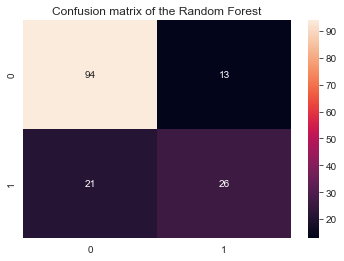

In [702]:
cm_logi = confusion_matrix(Y_test, y_pred)
plt.title('Confusion matrix of the Random Forest')
sns.heatmap(cm_logi,annot=True,fmt="d")
plt.show()

In [703]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       107
           1       0.70      0.70      0.70        47

    accuracy                           0.82       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.82      0.82      0.82       154



####  Logistic Regression Model

In [704]:
reg = LogisticRegression()
reg.fit(X_train,Y_train)   

LogisticRegression()

In [705]:
Y_pred=reg.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.8116883116883117

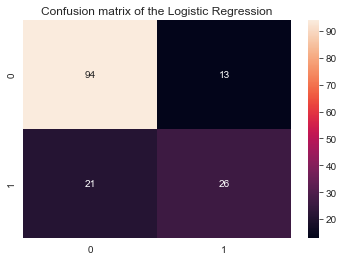

In [706]:
cm_logi = confusion_matrix(Y_test, y_pred)
plt.title('Confusion matrix of the Logistic Regression')
sns.heatmap(cm_logi,annot=True,fmt="d")
plt.show()

In [707]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.60      0.66        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.81       154



### Predictive System

In [656]:
input_data = (4,180,92,0,0,37.6,0.191,30)
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data = scaler.transform(input_data_reshape)


In [657]:
prediction = classifier.predict(std_data)
print(prediction)

[1]
